# OSE-Summer School 2019
## Wk3: ECON DSGE PS3, Perturbation Methods, Kerk Phillips

In [2]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import fsolve
import sys

### Exercise 1

$x_{uuu} = -\frac{F_{xxx}x_{u}^{3} + 3F_{xxu}x_{u}^{2} + 3F_{xuu}x_{u} + 3F_{xx}x_{u}x_{uu} + 3F_{xu}x_{uu} + F_{uuu}}{F_{x}}$

### Exercise 2

In [6]:
# write a function that find the market-clearing wage(w)

def find_wage(k,params):
    
    # parameters
    α,z,b,t,h = params
    
    # wage is a function of labor(n)
    w = lambda n : (1-α)*z*(k**α)*(n**(-α))
    
    # firm's profit is a function of labor(n)
    pi = lambda n : z*(k**α)*(n**(-α)) - w(n)*n
        
    # the market clearing condition (nd=ns)
    def market_clear(n):
        nd = lambda n : (((1-α)*z)/w(n))**(1/α)*k               # labor demand
        ns = lambda n : h - (b/(w(n)*(1+b))) * (w(n)*h+pi(n)-t) # labor supply
        zero = nd(n) - ns(n)
        return zero
    
    nss = fsolve(market_clear,1)
    
    # check if n <= h
    if nss > h:
        print("error: n exceeds h")
    
    # compute the market clearing wage(w*)
    wss = w(nss)
    
    return wss

In [7]:
# given parameters
α = 0.33
z = 1
b = 2
t = 0.1
h = 24
params = (α,z,b,t,h)

# find the market-clearing wage(w) for k=5
wss = find_wage(5,params)

print("the market clearing wage(w*) for k = 5 :", np.round(wss,4))
print("")

the market clearing wage(w*) for k = 5 : [0.414]



In [8]:
k,w = sy.symbols('k,w')

# the expression for the market clearing condition
eq = ((((1-α)*z)/w)**(1/α)*k) - \
    (h - (b/(w*(1+b))) * (w*h + (z*(k**α)*((((1-α)*z)/w)**(1/α)*k))**(1-α)-w*((((1-α)*z)/w)**(1/α)*k)) - t)

F = sy.lambdify((w,k), eq, 'numpy')

# derivativess
Fw = sy.lambdify((w,k), sy.diff(eq,w), 'numpy')
Fk = sy.lambdify((w,k), sy.diff(eq,k), 'numpy')
Fww = sy.lambdify((w,k), sy.diff(eq,w,w), 'numpy')
Fwk = sy.lambdify((w,k), sy.diff(eq,w,k), 'numpy')
Fkk = sy.lambdify((w,k), sy.diff(eq,k,k), 'numpy')

# Find a first-order approximation for wage as a function of k
def w_1st_approx(k, params, k0 = 5):
    w0 = find_wage(k0, params)
    w_k = -Fk(w0,k0)/Fw(w0,k0)
    w = w0 + w_k*(k-k0)
    return w

# Find a second-order approximation for wage as a function of k
def w_2nd_approx(k, params, k0 = 5):
    w0 = find_wage(k0, params)
    w_k = -Fk(w0,k0)/Fw(w0,k0)
    w_kk = -(Fww(w0,k0)*w_k**2 + 2*Fwk(w0,k0)*w_k + Fkk(w0,k0))/Fw(w0,k0)
    w = w0 + w_k*(k-k0) + 0.5*w_kk*(k-k0)**2
    return w    

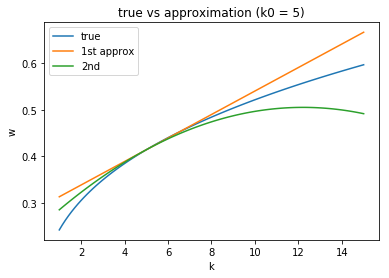

In [9]:
kgrid = np.linspace(1,15,100)
w_true = np.zeros((len(kgrid),1))
w_approx = np.zeros((len(kgrid),2))

k0 = 5
for i in range(len(kgrid)):
    k = kgrid[i]
    w_true[i] = find_wage(k,params)
    w_approx[i,0] = w_1st_approx(k, params, k0)
    w_approx[i,1] = w_2nd_approx(k, params, k0)

plt.plot(kgrid, w_true, kgrid, w_approx[:,0], kgrid, w_approx[:,1])
plt.legend(['true', '1st approx', '2nd'])
plt.title('true vs approximation (k0 = 5)')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

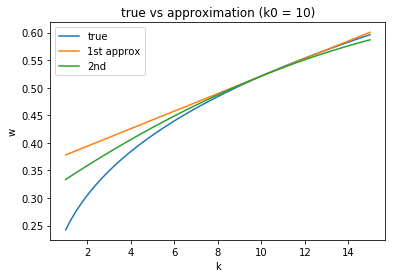

In [10]:
k0 = 10
for i in range(len(kgrid)):
    k = kgrid[i]
    w_true[i] = find_wage(k,params)
    w_approx[i,0] = w_1st_approx(k, params, k0)
    w_approx[i,1] = w_2nd_approx(k, params, k0)

plt.plot(kgrid, w_true, kgrid, w_approx[:,0], kgrid, w_approx[:,1])
plt.legend(['true', '1st approx', '2nd'])
plt.title('true vs approximation (k0 = 10)')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

### Excercise 3

In [11]:
# a function that finds y given x
def find_y(x):
    G = lambda y : (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
    y = fsolve(G,50)
    return y

# check
y0 = np.round(find_y(100),4)
print(y0)

[47.4658]


In [12]:
x,y = sy.symbols('x,y')

# the expression of F(y,x)
eq = (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)

F = sy.lambdify((y,x), eq, 'numpy')

# derivativess
Fy = sy.lambdify((y,x), sy.diff(eq,y), 'numpy')
Fx = sy.lambdify((y,x), sy.diff(eq,x), 'numpy')

Fyy = sy.lambdify((y,x), sy.diff(eq,y,y), 'numpy')
Fyx = sy.lambdify((y,x), sy.diff(eq,y,x), 'numpy')
Fxx = sy.lambdify((y,x), sy.diff(eq,x,x), 'numpy')

Fyyy = sy.lambdify((y,x), sy.diff(eq,y,y,y), 'numpy')
Fyyx = sy.lambdify((y,x), sy.diff(eq,y,y,x), 'numpy')
Fyxx = sy.lambdify((y,x), sy.diff(eq,y,x,x), 'numpy')
Fxxx = sy.lambdify((y,x), sy.diff(eq,x,x,x), 'numpy')

# Find a first-order approximation
def y_1st_approx(x, x0 = 100):
    y0 = find_y(x0)
    y_x = -Fx(y0,x0)/Fy(y0,x0)
    y = y0 + y_x*(x-x0)
    return y

# Find a second-order approximation
def y_2nd_approx(x, x0 = 100):
    y0 = find_y(x0)
    y_x = -Fx(y0,x0)/Fy(y0,x0)
    y_xx = -(Fyy(y0,x0)*y_x**2 + 2*Fyx(y0,x0)*y_x + Fxx(y0,x0))/Fy(y0,x0)
    y = y0 + y_x*(x-x0) + 0.5*y_xx*(x-x0)**2
    return y

# Find a third-order approximation
def y_3rd_approx(x, x0 = 100):
    y0 = find_y(x0)
    y_x = -Fx(y0,x0)/Fy(y0,x0)
    y_xx = -(Fyy(y0,x0)*y_x**2 + 2*Fyx(y0,x0)*y_x + Fxx(y0,x0))/Fy(y0,x0)
    y_xxx = -(Fyyy(y0,x0)*y_x**3 + 3*Fyyx(y0,x0)*y_x**2 + 3*Fyxx(y0,x0)*y_x
             + 3*Fyy(y0,x0)*y_x*y_xx + 3*Fyx(y0,x0)*y_xx + Fxxx(y0,x0))    
    y = y0 + y_x*(x-x0) + 0.5*y_xx*(x-x0)**2 + (1/6)*y_xxx*(x-x0)**3
    return y

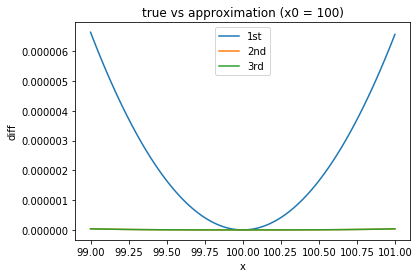

In [13]:
xgrid = np.linspace(99,101,100)
y_true = np.zeros((len(xgrid),1))
y_approx = np.zeros((len(xgrid),3))
diff = np.zeros((len(xgrid),3))

x0 = 100
for i in range(len(xgrid)):
    x = xgrid[i]
    y_true[i] = find_y(x)                  # compute true value
    y_approx[i,0] = y_1st_approx(x,x0)     # 1st order approximation
    y_approx[i,1] = y_2nd_approx(x,x0)     # 2nd order approximation
    y_approx[i,2] = y_3rd_approx(x,x0)     # 3rd order approximation
    
    # compute error
    diff[i,0] = np.abs(y_true[i] - y_approx[i,0])
    diff[i,1] = np.abs(y_true[i] - y_approx[i,1])
    diff[i,2] = np.abs(y_true[i] - y_approx[i,2])

plt.plot(xgrid, diff[:,0], xgrid, diff[:,1], xgrid, diff[:,2])
plt.legend(['1st', '2nd', '3rd'])
plt.title('true vs approximation (x0 = 100)')
plt.xlabel('x')
plt.ylabel('diff')
plt.show()

### Exercise 4

In [14]:
# parameters
α, β = 0.35, 0.98
kss = (α*β)**(1/(1-α))

k = sy.symbols('k')
H = α*β*(k**α)  # analytical solution for H(K) = K'
HK = sy.lambdify(k, H, 'numpy')
Hx = sy.lambdify(k, sy.diff(H,k), 'numpy')
Hxx = sy.lambdify(k, sy.diff(H,k,k), 'numpy')

print("<the scalar values of Hx and Hxx using analytical derivatives>")
print("Hx =", np.round(Hx(kss),4))
print("Hxx =", np.round(Hxx(kss),4))

<the scalar values of Hx and Hxx using analytical derivatives>
Hx = 0.35
Hxx = -1.1801


In [15]:
# u=k, x=x(u)=k', y=y(x)=k''
u,x,y = sy.symbols('u,x,y')

# the expression of F(y,x,u)
eq = 1/(u**α - x) - β*(α*x**(α-1))/(x**α - y)

F = sy.lambdify((y,x,u), eq, 'numpy')

# derivativess
Fy = sy.lambdify((y,x,u), sy.diff(eq,y), 'numpy')
Fx = sy.lambdify((y,x,u), sy.diff(eq,x), 'numpy')
Fu = sy.lambdify((y,x,u), sy.diff(eq,u), 'numpy')

Fyy = sy.lambdify((y,x,u), sy.diff(eq,y,y), 'numpy')
Fxx = sy.lambdify((y,x,u), sy.diff(eq,x,x), 'numpy')
Fuu = sy.lambdify((y,x,u), sy.diff(eq,u,u), 'numpy')

Fyx = sy.lambdify((y,x,u), sy.diff(eq,y,x), 'numpy')
Fyu = sy.lambdify((y,x,u), sy.diff(eq,y,u), 'numpy')
Fxu = sy.lambdify((y,x,u), sy.diff(eq,x,u), 'numpy')

G = lambda x_u : Fy(kss,kss,kss)*x_u**2 + Fx(kss,kss,kss)*x_u + Fu(kss,kss,kss)
x_u = fsolve(G,0.1)
x_uu = -((Fyy(kss,kss,kss)*x_u**4 + 2*Fyx(kss,kss,kss)*x_u**3 + 2*Fyu(kss,kss,kss)*x_u**2
        + Fxx(kss,kss,kss)*x_u**2 + Fuu(kss,kss,kss))/
         (Fy(kss,kss,kss)*x_u**2 + Fy(kss,kss,kss)*x_u + Fx(kss,kss,kss)))

# linear approximation of policy function K' = H(K)
def HK_1st_approx(k, kss):
    G = lambda x_u : Fy(kss,kss,kss)*x_u**2 + Fx(kss,kss,kss)*x_u + Fu(kss,kss,kss)
    x_u = fsolve(G,0.1)
    kp = kss + x_u*(k-kss)
    return kp

# quadratic approximation of policy function K' = H(K)
def HK_2nd_approx(k, kss):
    G = lambda x_u : Fy(kss,kss,kss)*x_u**2 + Fx(kss,kss,kss)*x_u + Fu(kss,kss,kss)
    x_u = fsolve(G,0.1)
    x_uu = -((Fyy(kss,kss,kss)*x_u**4 + 2*Fyx(kss,kss,kss)*x_u**3 + 2*Fyu(kss,kss,kss)*x_u**2
        + Fxx(kss,kss,kss)*x_u**2 + Fuu(kss,kss,kss))/
         (Fy(kss,kss,kss)*x_u**2 + Fy(kss,kss,kss)*x_u + Fx(kss,kss,kss)))
    kp = kss + x_u*(k-kss) + 0.5*x_uu*(k-kss)**2
    return kp

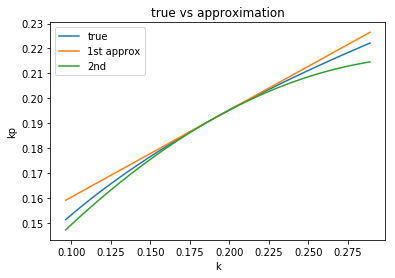

In [16]:
# compare solutions
kgrid = np.linspace(kss*0.5,kss*1.5,100)
kp_true = np.zeros((len(kgrid),1))
kp_approx = np.zeros((len(kgrid),2))

for i in range(len(kgrid)):
    k = kgrid[i]
    kp_true[i] = HK(k)
    kp_approx[i,0] = HK_1st_approx(k, kss)
    kp_approx[i,1] = HK_2nd_approx(k, kss)

plt.plot(kgrid, kp_true, kgrid, kp_approx[:,0], kgrid, kp_approx[:,1])
plt.legend(['true', '1st approx', '2nd'])
plt.title('true vs approximation')
plt.xlabel('k')
plt.ylabel('kp')
plt.show()

### Exercise 5 (currently incorrect and incomplete)

In [18]:
# parameters
α, β, ρ, σ, ν = (0.35, 0.98, 0.95, 0.02, 1)

H = lambda k,z : α*β*np.exp(z)*(k**α)

ϵ = 0.001

Hx = (H(kss+ϵ,0) - H(kss-ϵ,0)) / (2*ϵ)
Hz = (H(kss,ϵ) - H(kss,-ϵ)) / (2*ϵ)
Hxx = (H(kss+ϵ,0) - 2*H(kss,0) + H(kss-ϵ,0)) / (ϵ**2)
Hzz = (H(kss,ϵ) - 2*H(kss,0) + H(kss,-ϵ)) / (ϵ**2)
Hxz = (H(kss+ϵ,ϵ) - H(kss-ϵ,ϵ) - H(kss+ϵ,-ϵ) + H(kss-ϵ,-ϵ)) / (4*ϵ**2)
Hvv = 0

print("[Hx,Hz,Hxx,Hzz,Hxz,Hvv] =",np.round([Hx,Hz,Hxx,Hzz,Hxz,Hvv],4))

[Hx,Hz,Hxx,Hzz,Hxz,Hvv] = [ 0.35    0.1928 -1.1801  0.1928  0.35    0.    ]


In [39]:
def H_approx(k,z,kss,zss):
    P = np.array([Hx,Hz,0])
    Q = np.array([[Hxx,Hxz,0],[Hxz,Hzz,0],[0,0,Hvv]])
    X = np.array([[k-kss,z-zss,0]])
    kp = (H(kss,zss) + np.matmul(P, np.transpose(X)) + 
          0.5 * np.matmul(np.matmul(X, Q), np.transpose(X)))
    return kp          

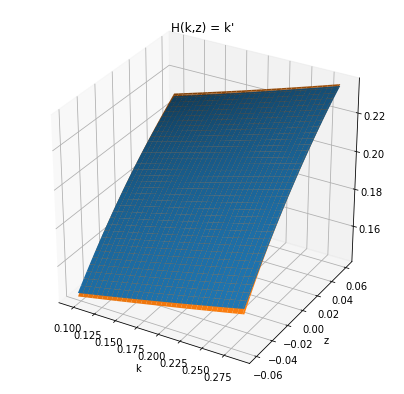

In [40]:
kgrid = np.linspace(kss*0.5, kss*1.5, 101)
zgrid = np.linspace(-3*σ, 3*σ, 101)

kp_true = np.zeros((len(kgrid),len(zgrid)))
kp_approx = np.zeros((len(kgrid),len(zgrid)))

for ik in range(len(kgrid)):
    k = kgrid[ik]
    for iz in range(len(zgrid)):
        z = zgrid[iz]
        kp_true[ik,iz] = H(k,z)
        kp_approx[ik,iz] = H_approx(k,z,kss,0)

K,Z = np.meshgrid(kgrid,zgrid)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
sub1 = ax.plot_surface(K, Z, kp_approx)
sub2 = ax.plot_surface(K, Z, kp_true)
plt.xlabel("k"); plt.ylabel("z"); plt.title("H(k,z) = k'")
plt.show()

### End